<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [14]:
from torch_geometric.datasets import TUDataset, GNNBenchmarkDataset
from torch_geometric import utils
import networkx as nx
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib import cm


In [15]:
all_datasets = ["MUTAG","ENZYMES","PROTEINS","CIFAR10","MNIST","COLLAB","IMDB-BINARY","REDDIT-BINARY"]

In [16]:
plt.style.use('seaborn')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Verdana'] 

## Hist of degrees of every node in the dataset

In [17]:
for dataset_txt in all_datasets[:3]:
    if dataset_txt in GNNBenchmarkDataset.names:
        dataset = GNNBenchmarkDataset(root='data_colab/GNNBenchmarkDataset', name=dataset_txt)
    else:
        dataset = TUDataset(root='data_colab/TUDataset',name=dataset_txt)
        
    degrees = []
    for i, graph in enumerate(dataset):
        G = utils.to_networkx(graph, to_undirected=True)
        degrees_in_G = list(dict(G.degree).values())
        degrees.extend(degrees_in_G)

    cmap = cm.get_cmap('seismic')
    ll = np.array(degrees)
    plt.hist(ll, color=cmap(64), bins = range(ll.max()))
    
    if dataset_txt in ["IMDB-BINARY","COLLAB","REDDIT-BINARY"]:
        plt.yscale('log')
        #plt.xscale('log')
    #plt.title(f'Degrees for graphs in {dataset_txt}\n{ll.mean():.1f}')
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    #plt.ticklabel_format(axis='y', style= 'scientific', scilimits=(1,3))
    plt.savefig(f"figs/Degree_hist_{dataset_txt}.png", bbox_inches='tight')
    #plt.savefig('norm.pgf', format='pgf')
    plt.show()

Extracting data_colab/TUDataset/MUTAG/MUTAG.zip
Processing...
Done!


AttributeError: 'tuple' object has no attribute 'num_nodes'

In [18]:
from matplotlib.ticker import MaxNLocator

# Average degree for all graphs in datasets

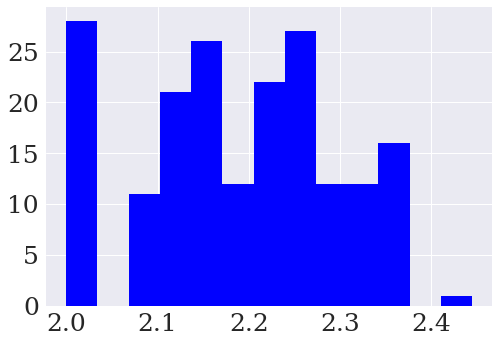

Extracting data_colab/TUDataset/ENZYMES/ENZYMES.zip
Processing...
Done!


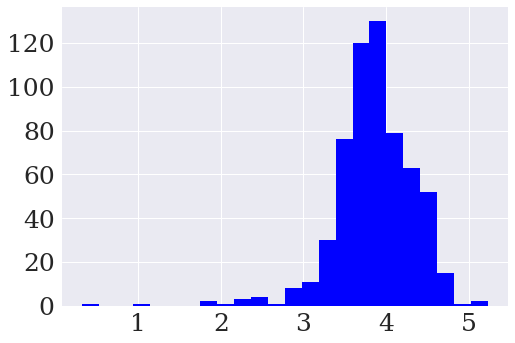

Extracting data_colab/TUDataset/PROTEINS/PROTEINS.zip
Processing...
Done!


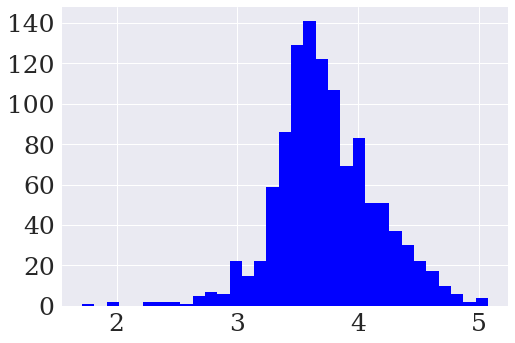

Extracting data_colab/GNNBenchmarkDataset/CIFAR10/raw/CIFAR10_v2.zip
Processing...
Done!


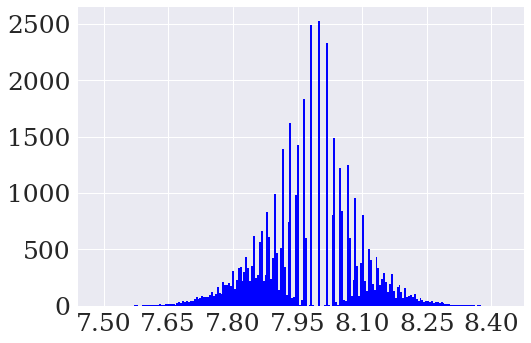

Extracting data_colab/GNNBenchmarkDataset/MNIST/raw/MNIST_v2.zip
Processing...
Done!


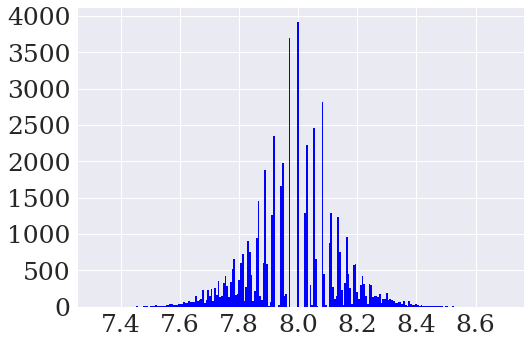

Extracting data_colab/TUDataset/COLLAB/COLLAB.zip
Processing...
Done!


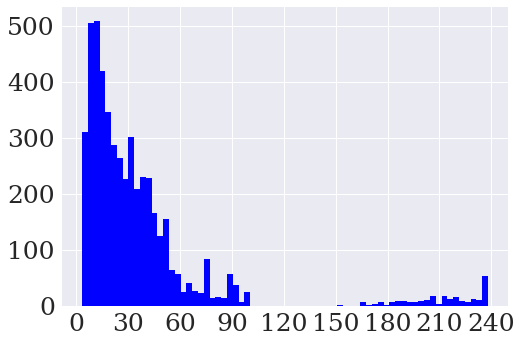

Extracting data_colab/TUDataset/IMDB-BINARY/IMDB-BINARY.zip
Processing...
Done!


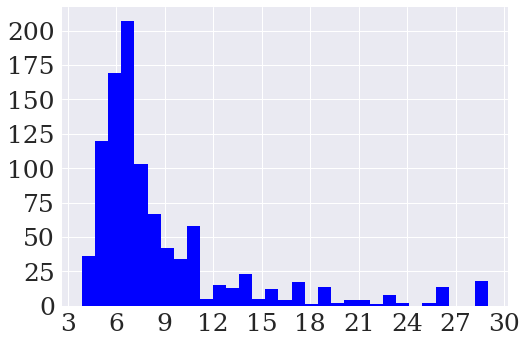

Extracting data_colab/TUDataset/REDDIT-BINARY/REDDIT-BINARY.zip
Processing...
Done!


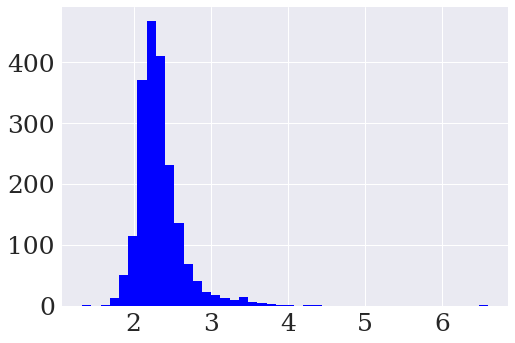

In [19]:
plt.style.use('seaborn')
plt.rcParams["font.family"] = 'serif'
plt.rcParams['font.size'] = '14'
for dataset_txt in all_datasets[:]:
    if dataset_txt in GNNBenchmarkDataset.names:
        dataset = GNNBenchmarkDataset(root='data_colab/GNNBenchmarkDataset', name=dataset_txt)
    else:
        dataset = TUDataset(root='data_colab/TUDataset',name=dataset_txt)
        
    avg_degrees = []
    for i, graph in enumerate(dataset):
        G = utils.to_networkx(graph, to_undirected=True)
        avg_degrees.append((G.number_of_edges()*2)/G.number_of_nodes())

    cmap = cm.get_cmap('seismic')
    ll = np.array(avg_degrees)
    
    if not dataset_txt == "MUTAG":
        plt.axes().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)

    plt.hist(ll, bins = int(np.sqrt(len(ll))), color=cmap(64))
    #plt.title(f'Average degree for graphs in {dataset_txt}\n{ll.mean():.1f}')
    plt.savefig(f"figs/avg_degree_hist_{dataset_txt}.png", bbox_inches='tight')
    plt.show()

## Number nodes of all graphs in each dataset

In [ ]:
plt.style.use('seaborn')
plt.rcParams["font.family"] = 'serif'
plt.rcParams['font.size'] = '14'
for dataset_txt in all_datasets[:]:
    if dataset_txt in GNNBenchmarkDataset.names:
        dataset = GNNBenchmarkDataset(root='data_colab/GNNBenchmarkDataset', name=dataset_txt)
    else:
        dataset = TUDataset(root='data_colab/TUDataset',name=dataset_txt)
        
    n_nodes = []
    for i, graph in enumerate(dataset):
        G = utils.to_networkx(graph, to_undirected=True)
        n_nodes.append(G.number_of_nodes())

    cmap = cm.get_cmap('seismic')
    ll = np.array(n_nodes)
    plt.hist(ll, bins = int(np.sqrt(len(ll))), color=cmap(64))
    plt.title(f'|N| for graphs in {dataset_txt}\n{ll.mean():.1f}')
    plt.savefig(f"figs/number_nodes_hist_{dataset_txt}.png", bbox_inches='tight')
    plt.show()

In [ ]:
statistics = dict()
for dataset_txt in all_datasets[:]:
    if dataset_txt in GNNBenchmarkDataset.names:
        dataset = GNNBenchmarkDataset(root='data_colab/GNNBenchmarkDataset', name=dataset_txt)
    else:
        dataset = TUDataset(root='data_colab/TUDataset',name=dataset_txt)
        
    nxdata = {
    'Assortativity':np.empty(len(dataset)),
    'Triangles':np.empty(len(dataset)),
    'Transitivity':np.empty(len(dataset)),
    'Clustering':np.empty(len(dataset)),
    'Nodes':np.empty(len(dataset)),
    'Edges':np.empty(len(dataset)),
    'AVG degree':np.empty(len(dataset))
    }
    for i, graph in enumerate(dataset):
        G = utils.to_networkx(graph, to_undirected=True)
        nxdata['Assortativity'][i] = nx.degree_assortativity_coefficient(G)
        nxdata['Triangles'][i] = np.sum(list(nx.triangles(G).values()))/3
        nxdata['Transitivity'][i] = nx.transitivity(G)
        nxdata['Clustering'][i] = nx.average_clustering(G)
        nxdata['Nodes'][i] = G.number_of_nodes()
        nxdata['Edges'][i] = G.number_of_edges()
        nxdata['AVG degree'][i] =  (nxdata['Edges'][i]*2)/ nxdata['Nodes'][i]
        
    statistics[dataset_txt] = nxdata.copy()

    print(dataset_txt,'-----------------')
    for metric in statistics[dataset_txt]:
        nans = np.isnan(statistics[dataset_txt][metric])
        mean = statistics[dataset_txt][metric][~nans].mean()
        print(f"\t{metric:>13}: {mean:>9.4f} +- {statistics[dataset_txt][metric].std():<9.4f} || nans: {np.sum(nans)}")
    print()


In [ ]:
for dt in statistics:
    print(dt,'-----------------')
    for metric in statistics[dt]:
        nans = np.isnan(statistics[dt][metric])
        mean = statistics[dt][metric][~nans].mean()
        print(f"\t{metric:>13}: {mean:>9.4f} +- {statistics[dt][metric].std():<9.4f} || nans: {np.sum(nans)}")
    print()

In [ ]:
mean_statistics = statistics.copy()
std_statistics = statistics.copy()

In [ ]:
for dt in mean_statistics:
    for metric in statistics[dt]:
        nans = np.isnan(statistics[dt][metric])
        mean = statistics[dt][metric][~nans].mean()
        std = statistics[dt][metric][~nans].std()
        mean_statistics[dt][metric] = mean
        std_statistics[dt][metric] = std